## Going to load the test data

In [1]:
import csv

data_folder = "./data"

lines = []

with open(data_folder + "/driving_log.csv", "r") as file:
    reader = csv.reader(file)
    for line in reader:
        lines.append(line)
print("There are", len(lines), "measurements.")
print("The data is in the following format:")
print("\tCenter Image | Left Image | Right Image | Steering | Throttle | Brake | Speed")

There are 18273 measurements.
The data is in the following format:
	Center Image | Left Image | Right Image | Steering | Throttle | Brake | Speed


# Data preprocessing:
1. Modify the paths of the images in the csv file so that this model can run on an EC2 instance with a GPU for training.
2. Crop all images so that only the road visible and not the sky.
3. Increase sample size by flipping all images in the the training set.

#### Going to visualize the images before they are modified 

In [2]:
from matplotlib import pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def display_images(left, center, right):
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)

    # Fine-tune figure; make subplots spaced out
    f.subplots_adjust(wspace = .3)
    f.set_size_inches(12, 5)

    ax1.imshow(left)
    ax2.imshow(center)
    ax3.imshow(right)
    plt.show()

In [3]:
import cv2
import numpy as np

# TODO: convert these values to numpy arrays because that is the format that keras requires
# images will hold the images
images = []

# measurements will hold the measured driving angle
measurements = []

# steering offset hyperparameter
offset = 0.2

3 images
(160, 320, 3)
3 measurements
-0.2507208


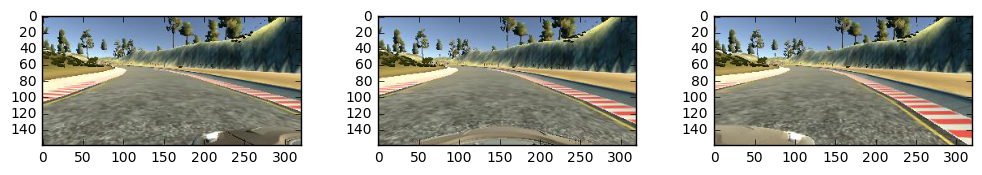

In [4]:
# Modifiying the paths of the images
for line in lines:
    # images are in the following order: center, left, right
    for i in range(0, 3):
        source = line[i].split("\\")[-1]
        source = data_folder + "/IMG/" + source
        image = cv2.imread(source)
        # the image is originally opened in BGR, gonna have to change it to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
    center = float(line[3])
    left = center + offset
    right = center - offset
    measurements.append(center)
    measurements.append(left)
    measurements.append(right)
    break;
print(len(images), "images")
print(images[0].shape)
print(len(measurements), "measurements")
print(measurements[0])

display_images(images[1], images[0], images[2])

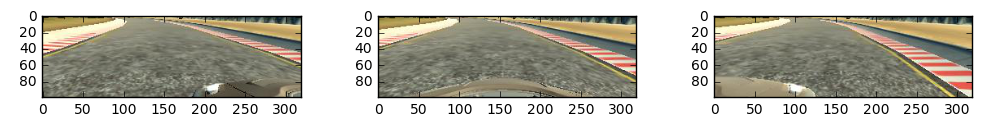

In [5]:
# cropping the images
def crop_image(image):
    cropped = image[60:160, 0:319]
    return cropped

cropped = []
for image in images:
    crop = crop_image(image)
    cropped.append(crop)

display_images(cropped[1], cropped[0], cropped[2])

In [6]:
# going to convert the images and measurement lists into numpy arrays
images = np.array(images)
measurements = np.array(measurements)

There are 3 modified images.
There are 3 modified measurements.
There are 6 modified images.
There are 6 modified measurements.


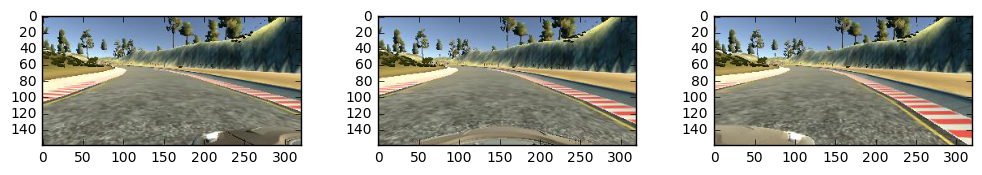

In [7]:
# going to flip all images here
modified_images = []
modified_measurements = []
for image in images:
    modified_images.append(cv2.flip(image, 1))

for measurement in measurements: 
    modified_measurements.append(-1 * measurement)

print("There are", len(modified_images), "modified images.")
print("There are", len(modified_measurements), "modified measurements.")

images = np.append(images, np.array(modified_images), axis=0)
measurements = np.append(measurements, modified_measurements)

print("There are", len(images), "modified images.")
print("There are", len(measurements), "modified measurements.")
f, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Fine-tune figure; make subplots spaced out
f.subplots_adjust(wspace = .3)
f.set_size_inches(12, 5)

ax1.imshow(images[1])
ax2.imshow(images[0])
ax3.imshow(images[2])

plt.show()